In [389]:
# # # Liver Disease Prediction- Not removing duplicates but removing outliers (XG-Boost) 

In [390]:
# Import all required libraries for reading data, analysing and visualizing data to perform data pre-proccessing

In [391]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [392]:
# # # Data Pre-Proccessing

In [393]:
# # Data Analysis

In [394]:
# Read the training & test data by loading the dataset

In [395]:
liver_df = pd.read_csv("patients.csv")

In [396]:
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [397]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [398]:
liver_df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [399]:
# given in the website 416 liver disease patients and 167 non liver disease patients
# 2- non liver patient and 1 is liver patient 

In [400]:
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [401]:
# Checking for null values in the dataset

In [402]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [403]:
# Here is the observation from the dataset:   
# 1) Only gender is non-numeric veriable. All others are numeric.   
# 2) There are 10 features and 1 output - dataset.   
# 3) In Albumin and Globulin ration we can see four missing values

In [404]:
liver_df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [405]:
# Here we get a clear idea of 416 patients who have liver disease represented as 1 and 167 patients who do not have are represented by 2

In [406]:
# Let us first fill in the null values of the dataset rather than dropping the whole row

In [407]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [408]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [409]:
# Clearly shows 4 null values 

In [410]:
# We will now take the mean of Albumin and Globulin ratio and fill them in the null values 

In [411]:
liver_df['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [412]:
liver_df['Albumin_and_Globulin_Ratio'] = liver_df['Albumin_and_Globulin_Ratio'].fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [413]:
# Thus the null values have been filled and can be checked

In [414]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [415]:
# By the information we can see that there are no null values 

In [416]:
# # Data Cleaning 

In [417]:
# Let us check for duplicate values and rows in the dataset 

In [418]:
duplicateRowsDF = liver_df[liver_df.duplicated(keep='first')]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
19    40  Female              0.9               0.3                   293   
26    34    Male              4.1               2.0                   289   
34    38  Female              2.6               1.2                   410   
55    42    Male              8.9               4.5                   272   
62    58    Male              1.0               0.5                   158   
106   36    Male              5.3               2.3                   145   
108   36    Male              0.8               0.2                   158   
138   18    Male              0.8               0.2                   282   
143   30    Male              1.6               0.4                   332   
158   72    Male              0.7               0.1                   196   
164   39    Male              1.9               0.9                   180   
174   31  

In [419]:
duplicateRowsDF = liver_df[liver_df.duplicated(keep='last')]
print("Duplicate Rows except last occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except last occurrence based on all columns are :
     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
18    40  Female              0.9               0.3                   293   
25    34    Male              4.1               2.0                   289   
33    38  Female              2.6               1.2                   410   
54    42    Male              8.9               4.5                   272   
61    58    Male              1.0               0.5                   158   
105   36    Male              5.3               2.3                   145   
107   36    Male              0.8               0.2                   158   
137   18    Male              0.8               0.2                   282   
142   30    Male              1.6               0.4                   332   
157   72    Male              0.7               0.1                   196   
163   39    Male              1.9               0.9                   180   
173   31   

In [420]:
liver_df.shape # These are the total rows and columns in the dataset

(583, 11)

In [421]:
# Let us now check for outliers in the datasets and try correcting them 

In [422]:
# # Removing Outliers and seeing for each column

In [423]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [424]:
# # Distribution of Numerical Features

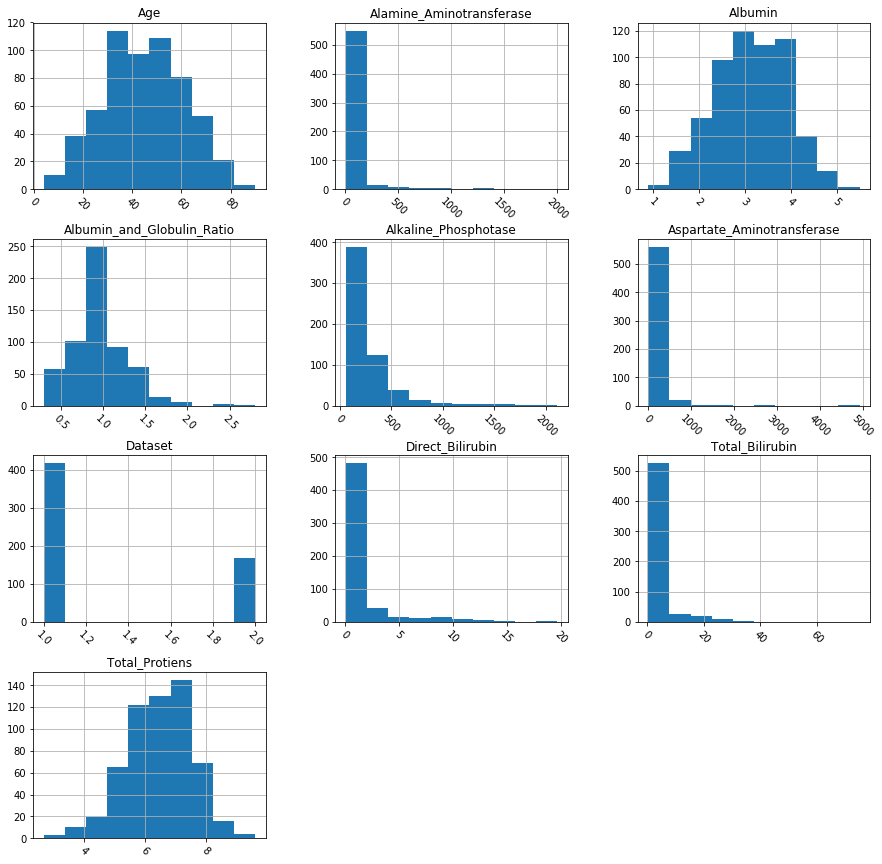

In [425]:
# Plot histogram grid
liver_df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [426]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [427]:
# It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

In [428]:
# Thus let us try eliminating outliers

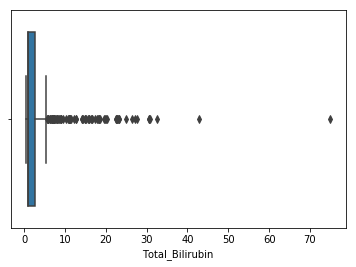

In [429]:
sns.boxplot(liver_df.Total_Bilirubin)

In [430]:
liver_df.Total_Bilirubin.sort_values(ascending=False).head()

166    75.0
559    42.8
505    32.6
531    30.8
259    30.5
Name: Total_Bilirubin, dtype: float64

In [431]:
# These outliers values will not matter since one of the highest recorded bilirubin count is 80 mg/dl
# Since 75 is the highest and can be seen in a liver disease patient we will be keeping it

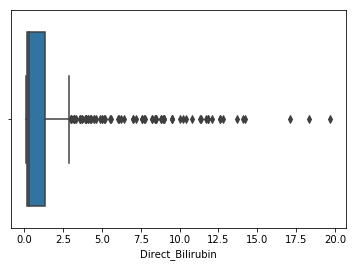

In [432]:
sns.boxplot(liver_df.Direct_Bilirubin)

In [433]:
liver_df.Direct_Bilirubin.sort_values(ascending=False).head()

559    19.7
531    18.3
504    17.1
259    14.2
505    14.1
Name: Direct_Bilirubin, dtype: float64

In [434]:
# Any direct bilirubin is a part of Total Bilirubin and constitutes of only 10% of the total bilirubin this is mostly negligable

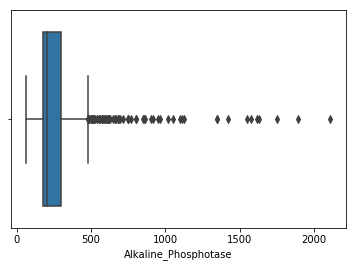

In [435]:
sns.boxplot(liver_df.Alkaline_Phosphotase)

In [436]:
# The ALP levels ranged from 1,005 to 3,067 IU/L so even this would not matter 

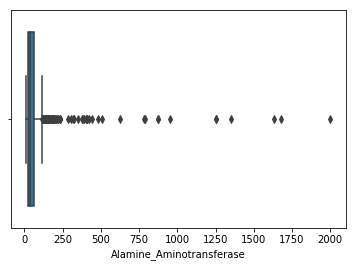

In [437]:
sns.boxplot(liver_df.Alamine_Aminotransferase)

In [438]:
# The measures of ALT can be  >1,000 IU/l thus the outliers can be considered and the difference between the outliers is neglegeble

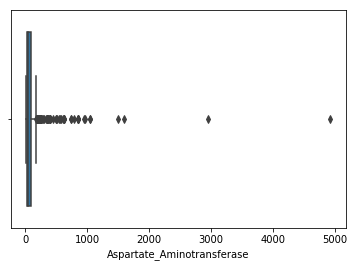

In [439]:
sns.boxplot(liver_df.Aspartate_Aminotransferase)

In [440]:
liver_df.Aspartate_Aminotransferase.sort_values(ascending=False).head() # Here the difference of values is very high so we can eleminate some of the outliers

135    4929
117    2946
118    1600
207    1500
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [441]:
liver_df = liver_df[liver_df.Aspartate_Aminotransferase <=3000 ] # We have dropped out one row 
liver_df.shape

(582, 11)

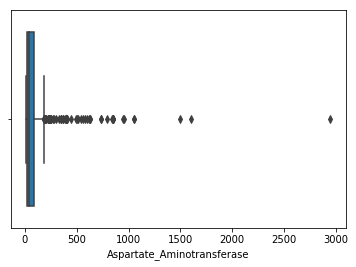

In [442]:
sns.boxplot(liver_df.Aspartate_Aminotransferase)

In [443]:
liver_df.Aspartate_Aminotransferase.sort_values(ascending=False).head() # We can observe another outliers and this can also be elimated

117    2946
118    1600
207    1500
199    1050
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [444]:
liver_df = liver_df[liver_df.Aspartate_Aminotransferase <=2500 ]
liver_df.shape

(581, 11)

In [445]:
# Hence we have eliminated two rows in outlier elimination of Aspartate_Aminotransferase

In [446]:
liver_df.shape

(581, 11)

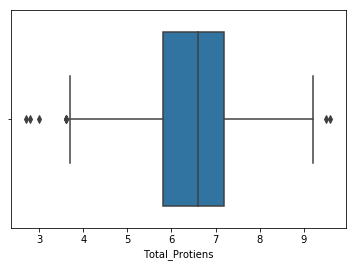

In [447]:
sns.boxplot(liver_df.Total_Protiens)

In [448]:
# These outliers will not create any hinderence to the model

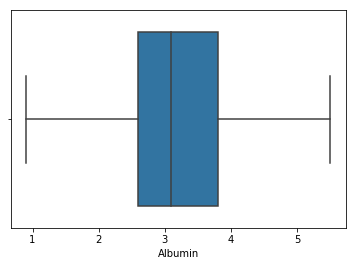

In [449]:
sns.boxplot(liver_df.Albumin)

In [450]:
# We can obsereve that there are no outliers present 

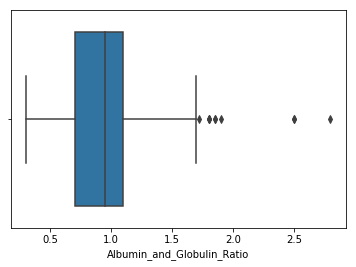

In [451]:
sns.boxplot(liver_df.Albumin_and_Globulin_Ratio)

In [452]:
# By this observation we can see that these outliers would not cause any hinderence to the model thus can be used

In [453]:
# Data Visualization

Text(0, 0.5, 'Frequency')

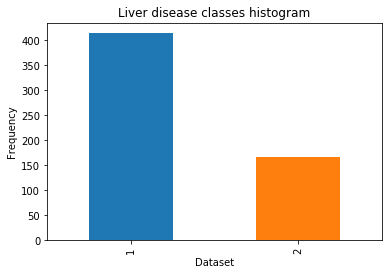

In [454]:
count_classes = pd.value_counts(liver_df['Dataset'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

In [455]:
# 2- non liver patient and 1 is liver patient 

In [456]:
liver_df['Dataset'].value_counts()

1    414
2    167
Name: Dataset, dtype: int64

Number of patients that are male:  439
Number of patients that are female:  142


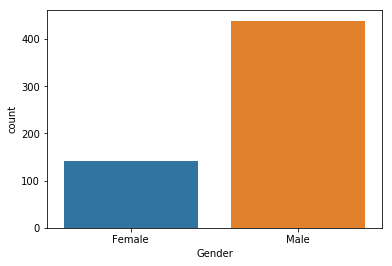

In [457]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

C:\Users\nitin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nitin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


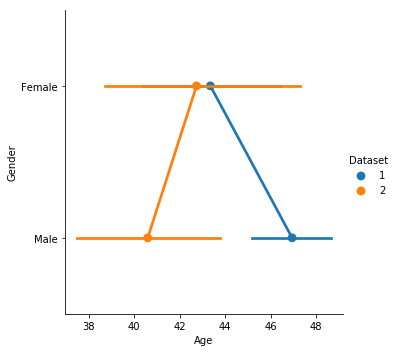

In [458]:
sns.factorplot (x="Age", y="Gender", hue="Dataset", data=liver_df);

In [459]:
# Age seems to be a factor for liver disease for both male and female genders

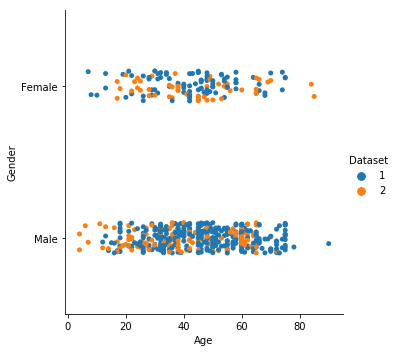

In [460]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=liver_df);

In [461]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=True)

,Dataset,Gender,Age
0,1,Female,43.347826
1,1,Male,46.937888
2,2,Female,42.740000
3,2,Male,40.598291


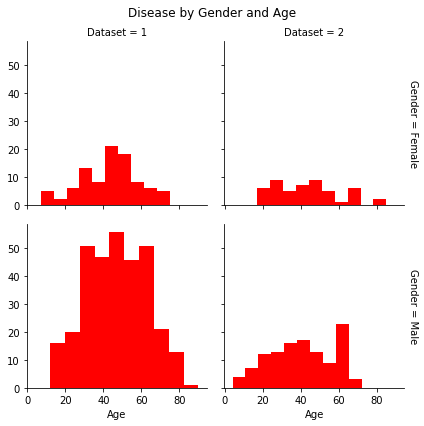

In [462]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

In [463]:
# So here we can clearly observe that at the age of 40 to 60 people diagnosed with liver disease is very high

In [464]:
# # # Feature Selection Observation

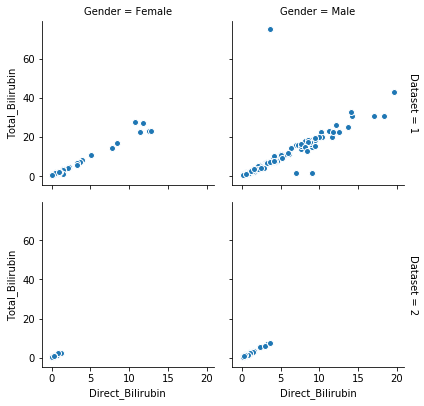

In [465]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

In [466]:
# In this scatter plot we can observe that all the values are in a linear line this shows that there is a direct relationship between both Direct and Total Bilirubin

In [467]:
# # # Feature Selection Start

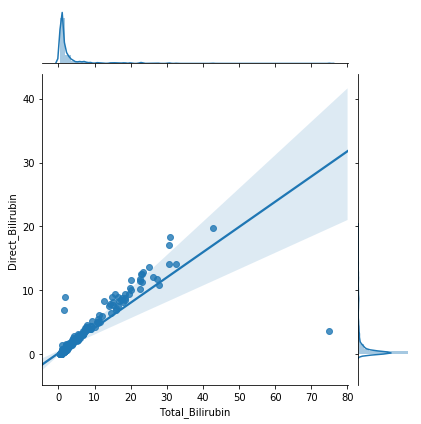

In [468]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

In [469]:
# Here we can almost observe a linear line which represents high similarity in both Direct and Total Bilirubin

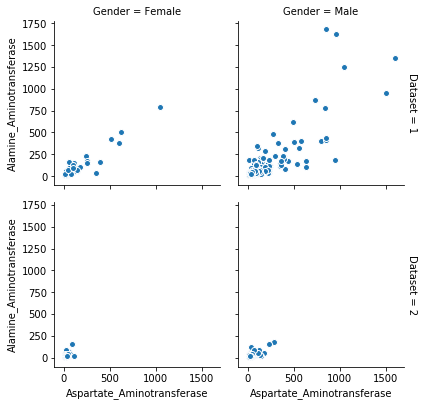

In [470]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [471]:
# There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. But not as much as Total and Direct Bilirubin

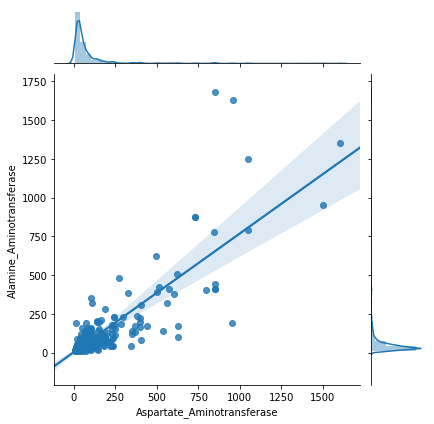

In [472]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

In [473]:
# The jointplot for Alamine_Aminotransferase and Aspartate_Aminotranferase shows lower linear relationship than expected

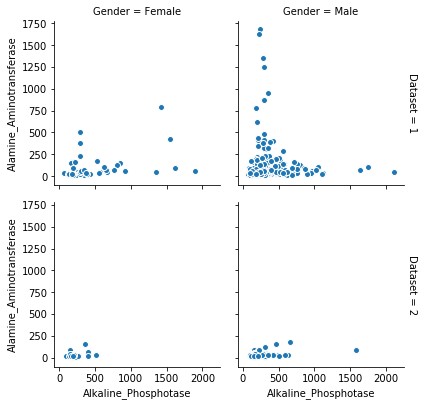

In [474]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [475]:
# To confirm if there is co-relation between Alamine_Aminotransferase and Alkaline_Phosphatase we such have a joint plot

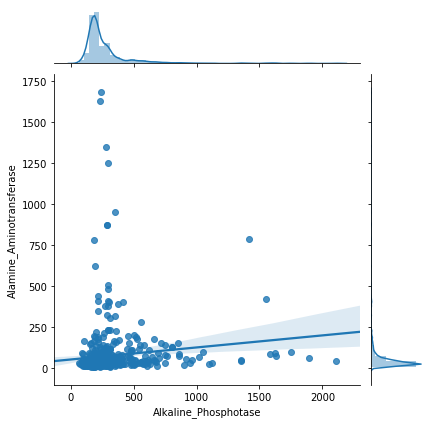

In [476]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

In [477]:
# The joinplot shows no linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

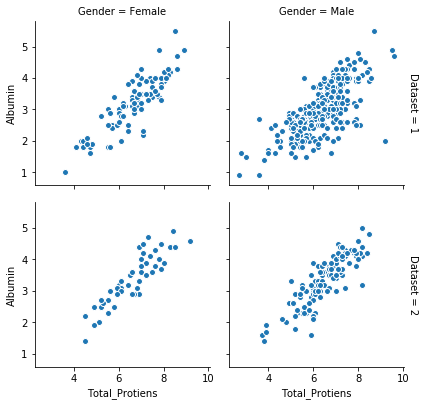

In [478]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [479]:
# There is linear relationship between Total_Protiens and Albumin and the gender. 

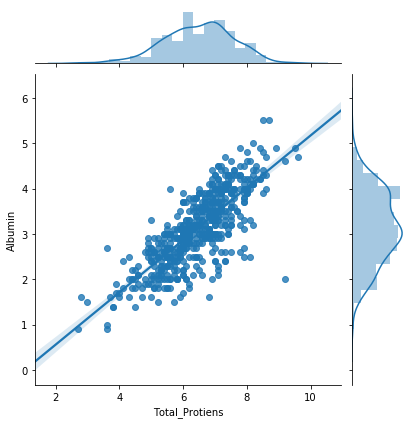

In [480]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

In [481]:
# There is a linear relationship and can be considered for dropping only under analysis 

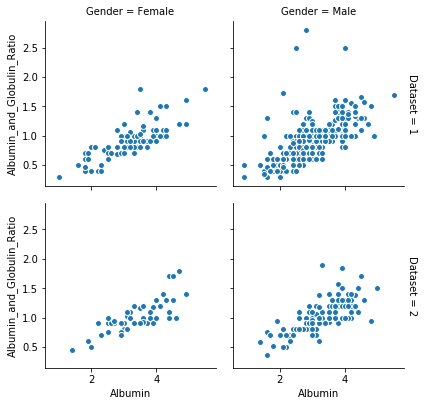

In [482]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

In [483]:
# There is linear relationship between Albumin_and_Globulin_Ratio and Albumin.

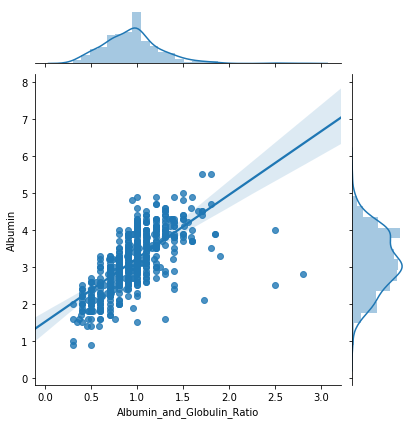

In [484]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

In [485]:
# Thus by this information we can observe that the jointplot has lesser linear relationship than showed in scatter plot 

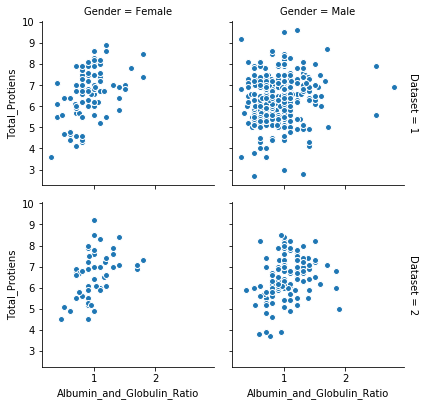

In [486]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

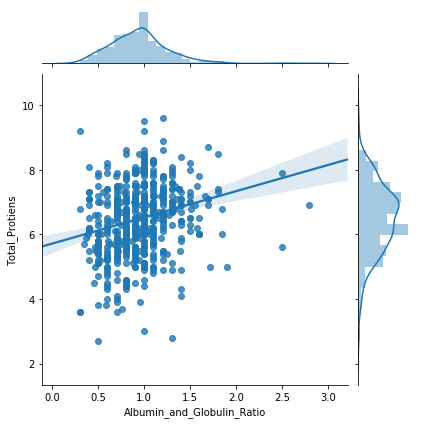

In [487]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Total_Protiens", data=liver_df, kind="reg")

In [488]:
# By this plot we can observe that the linear relationship is lower than expected.

In [489]:
# # Observation
#From the above jointplots and scatterplots, we find direct relationship between the following features:
#Direct_Bilirubin & Total_Bilirubin
#Aspartate_Aminotransferase & Alamine_Aminotransferase
#Total_Protiens & Albumin
#Albumin_and_Globulin_Ratio & Albumin
#Total_Protiens & Albumin_and_Globulin_Ratio

In [490]:
# # Label Encoding

In [491]:
# Have to remap the class labels for convenience, no liver disease then:=0 for patients having liver disease then:=1

In [492]:
liver_df['Dataset'] = liver_df['Dataset'].map({2:0,1:1})

In [493]:
liver_df['Dataset'].value_counts()

1    414
0    167
Name: Dataset, dtype: int64

In [494]:
# # Encoding -2  Male and Female

In [495]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [496]:
liver_df = binary_encode(liver_df, 'Gender', 'Male')

In [497]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [498]:
# 1 is male and 0 is female

In [499]:
# # Corelation

In [500]:
liver_df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056191,0.010959,0.006532,0.073149,-0.101570,-0.074565,-0.190016,-0.264290,-0.212435,0.137148
Gender,0.056191,1.000000,0.086896,0.097837,-0.030728,0.076589,0.091501,-0.088988,-0.093207,-0.003125,0.081279
Total_Bilirubin,0.010959,0.086896,1.000000,0.873698,0.202920,0.201253,0.295247,-0.007304,-0.221626,-0.207207,0.218043
Direct_Bilirubin,0.006532,0.097837,0.873698,1.000000,0.230850,0.218843,0.315518,0.000750,-0.227905,-0.201077,0.243829
Alkaline_Phosphotase,0.073149,-0.030728,0.202920,0.230850,1.000000,0.112336,0.130660,-0.032105,-0.161643,-0.227959,0.183574
Alamine_Aminotransferase,-0.101570,0.076589,0.201253,0.218843,0.112336,1.000000,0.840120,-0.040410,-0.026819,-0.008081,0.168747
Aspartate_Aminotransferase,-0.074565,0.091501,0.295247,0.315518,0.130660,0.840120,1.000000,-0.045559,-0.104003,-0.081639,0.206801
Total_Protiens,-0.190016,-0.088988,-0.007304,0.000750,-0.032105,-0.040410,-0.045559,1.000000,0.786182,0.237231,-0.034787
Albumin,-0.264290,-0.093207,-0.221626,-0.227905,-0.161643,-0.026819,-0.104003,0.786182,1.000000,0.686117,-0.160824
Albumin_and_Globulin_Ratio,-0.212435,-0.003125,-0.207207,-0.201077,-0.227959,-0.008081,-0.081639,0.237231,0.686117,1.000000,-0.162556


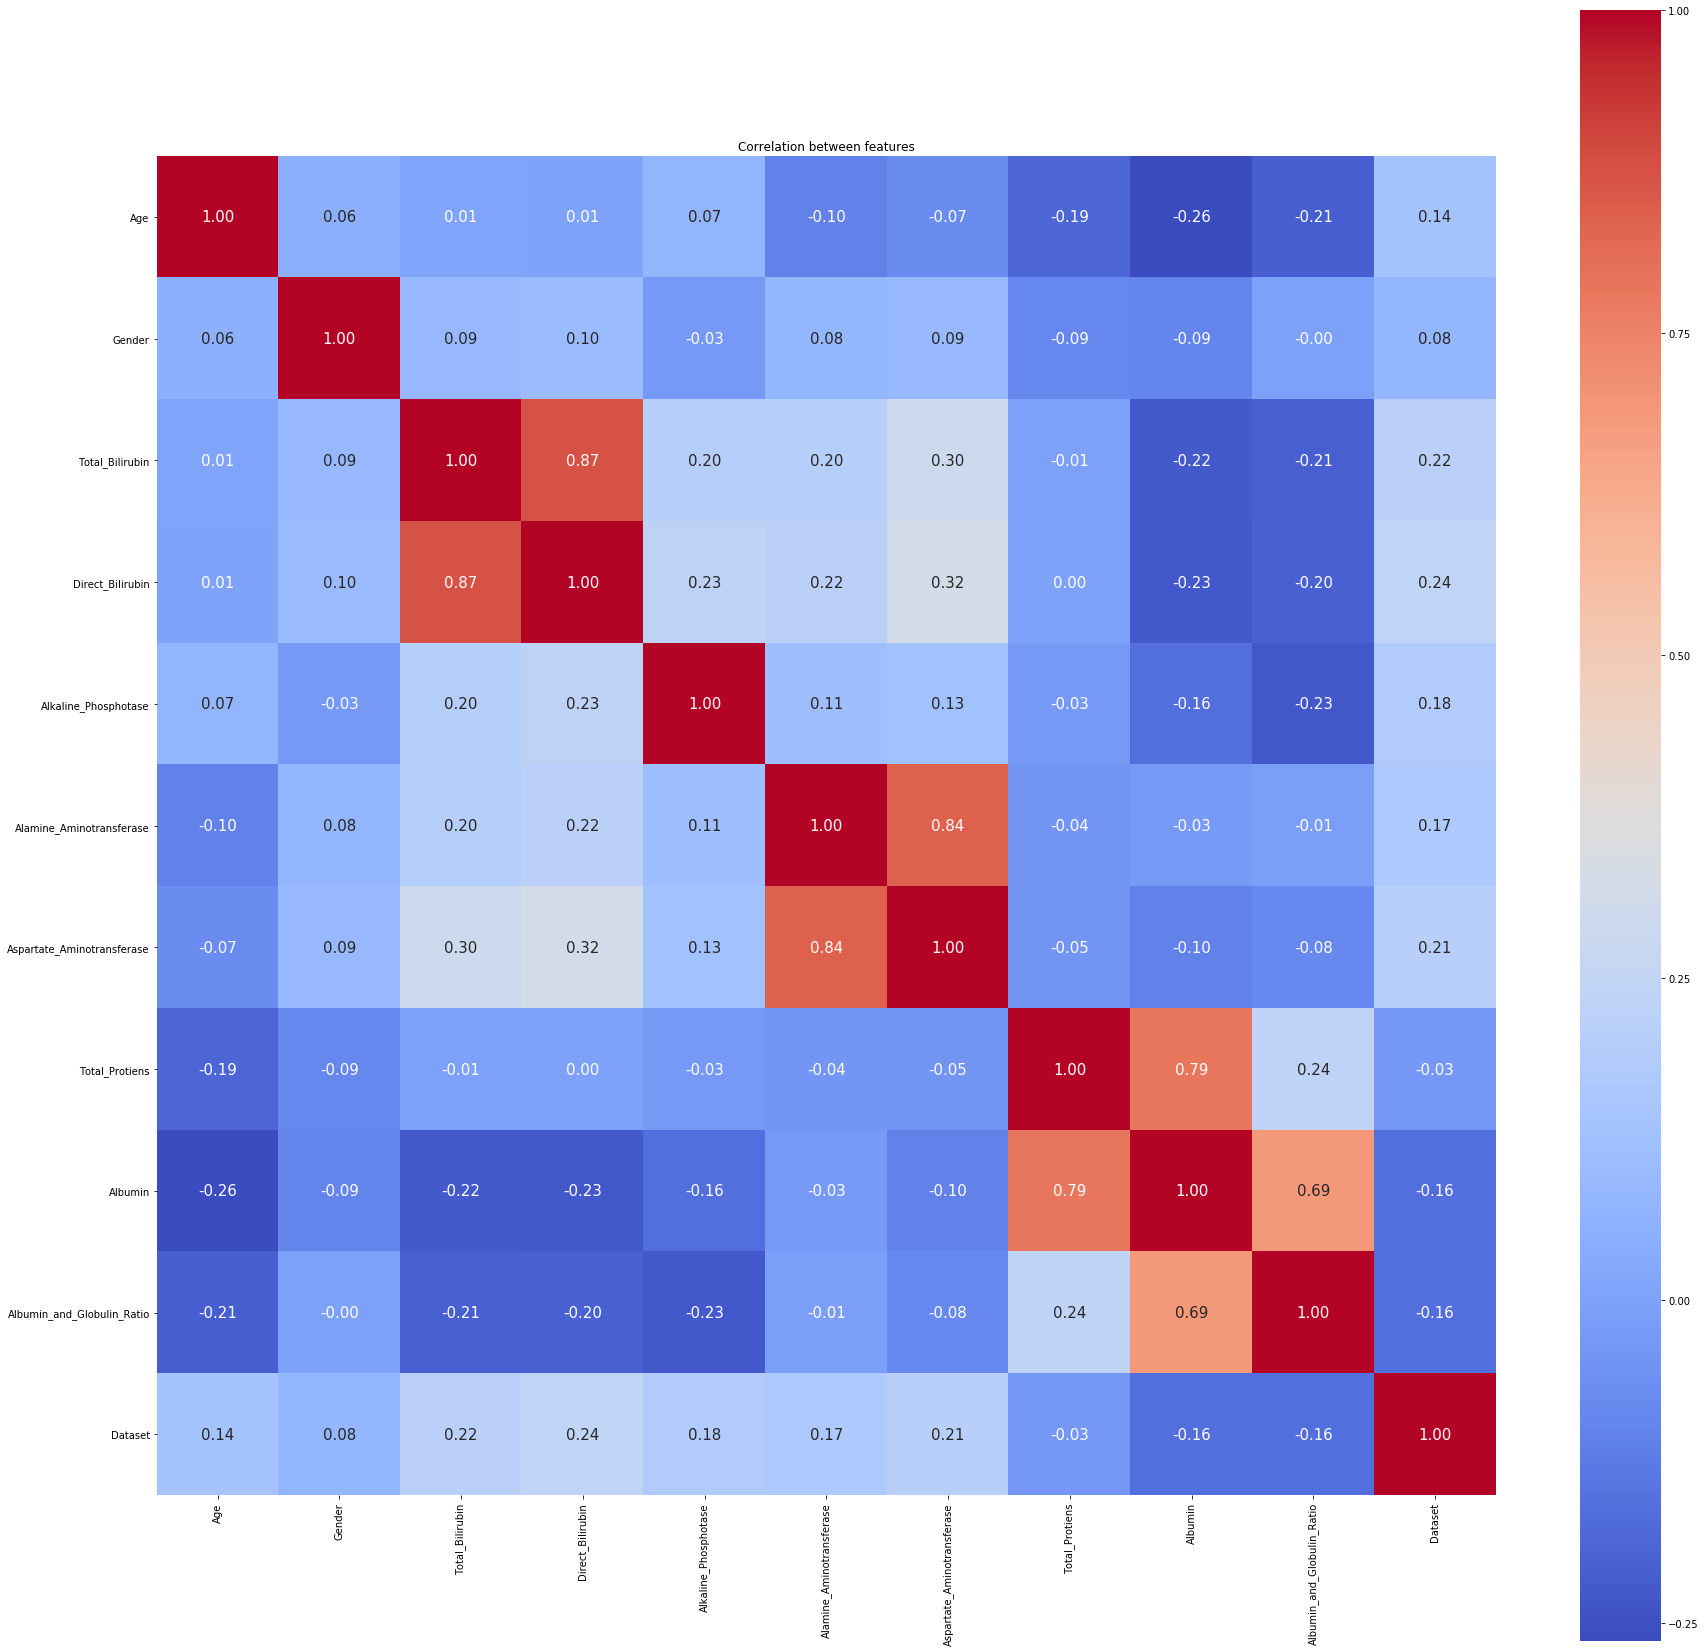

In [501]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_df.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [502]:
#The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [503]:
# Now train test split can be done directly or direct bilirubin can be dropped and then train test split can be done

In [504]:
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [505]:
liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,44.731497,0.755594,3.268847,1.470912,289.332186,75.397590,96.734940,6.483649,3.142857,0.947226,0.712565
std,16.185035,0.430105,6.198989,2.801274,240.929589,157.252834,172.276508,1.086623,0.796266,0.318163,0.452956
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


In [506]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import keras.backend
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Data Preparation

In [507]:
X =liver_df.iloc[: , :-1].values
y =liver_df.iloc[: , -1].values

Train test split

In [508]:
# splitting data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

feature scaling 

In [509]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [510]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(464, 10)
(464,)
(117, 10)
(117,)


# Machine Learning models 

XG Boost

In [511]:
from xgboost import XGBClassifier as XGBC
model=XGBC(learning_rate=0.05,n_estimators=80)
model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=None, max_depth=None,
       min_child_weight=None, missing=nan, monotone_constraints=None,
       n_estimators=80, n_jobs=None, num_parallel_tree=None,
       objective='binary:logistic', random_state=None, reg_alpha=None,
       reg_lambda=None, scale_pos_weight=None, subsample=None,
       tree_method=None, use_label_encoder=True, validate_parameters=None,
       verbosity=None)>

In [512]:
model.fit(X_train,y_train)

[00:15:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nitin\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=80, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [513]:
prediction=model.predict(X_test)

In [514]:
prediction

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [515]:
model.feature_importances_

array([0.09452315, 0.05963931, 0.1904015 , 0.17393647, 0.09038284,
       0.08904354, 0.07305159, 0.0697805 , 0.07689185, 0.08234921],
      dtype=float32)

In [516]:
ac=accuracy_score(y_test,prediction)
ac

0.6923076923076923